In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# june_start = dt.date(2017,6,1) 
# june_end = dt.date(2017,6,30)

results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
#print(results)



In [5]:
#  3. Convert the June temperatures to a list.
# the code from step 2 already returned a list

results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
#print(results)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(results, columns=['date','temprature'])
june_temps_df.head()

,date,temprature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,temprature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
#print(dec_results)

In [9]:
# 7. Convert the December temperatures to a list.
#The code from previous step already returns a list
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
print(dec_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_results, columns=['date','temprature'])
dec_temps_df.head()

,date,temprature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,temprature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


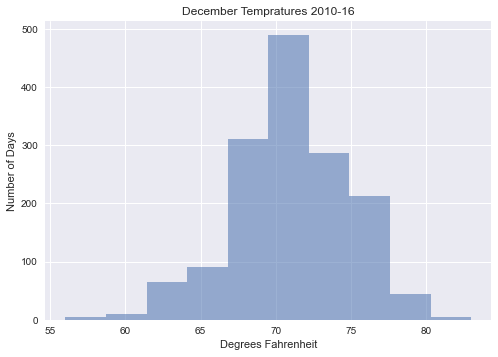

In [32]:
# x = june_temps_df['date']
# y = june_temps_df['temprature']
#plt.style.reload_library()
plt.style.use('seaborn')


#plt.boxplot()
dec_temps_df.hist(alpha=0.55)
plt.title('December Tempratures 2010-16')
plt.ylabel('Number of Days')
plt.xlabel('Degrees Fahrenheit')

plt.savefig('december.png', bbox_inches='tight')

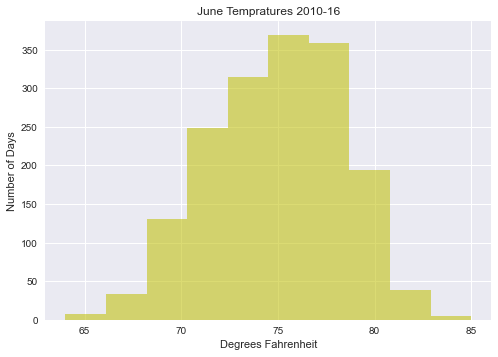

In [33]:
#plt.style.available
june_temps_df.hist(facecolor='y', alpha=0.55)
plt.title('June Tempratures 2010-16')
plt.ylabel('Number of Days')
plt.xlabel('Degrees Fahrenheit')
plt.savefig('june.png', bbox_inches='tight')